In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.unicode_minus'] = False

lotto = pd.read_csv('lotto.csv')

### 1.
- 연관규칙 분석을 위해 lotto 데이터를 transaction 데이터로 변환. 추첨된 순서는 고려하지 않음. 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력 후 설명

In [3]:
from pandas import DataFrame
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# 트랜잭션 생성을 위해 로또번호만 추출한다.
transactions = lotto.iloc[:,1:].values

# 이항값으로 구성되는 트랜잭션 테이블을 생성한다.
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_).map(lambda x: 1 if x else 0)

# 빈발집합을 생성한다.
fset = apriori(df, min_support=0.01, use_colnames=True, verbose=0)

# 지지도만 표현되고 빈도가 표현되지 않으므로 빈도데이터를 생성한다.
def itemsetFrequency(itemset):
    set = list(itemset)
    count = 0
    for item in set:
        count += df[item].sum()
    return count

fset['frequency'] = fset.itemsets.apply(lambda x : itemsetFrequency(x))

c:\Users\krkim1\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<Axes: xlabel='itemsets'>

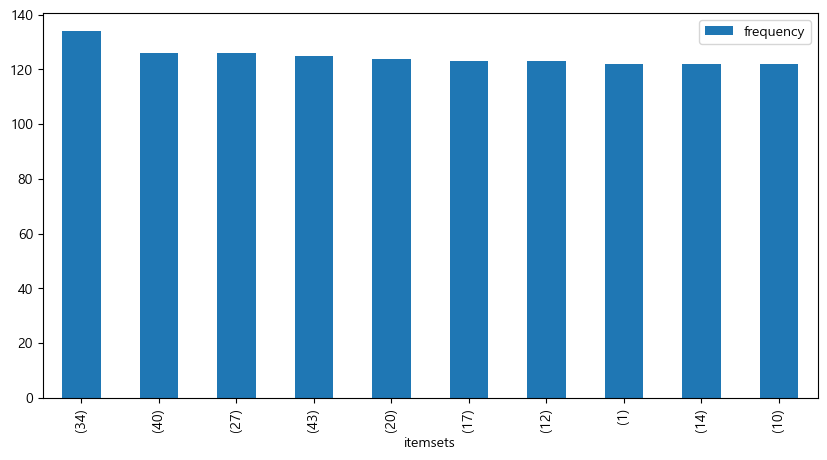

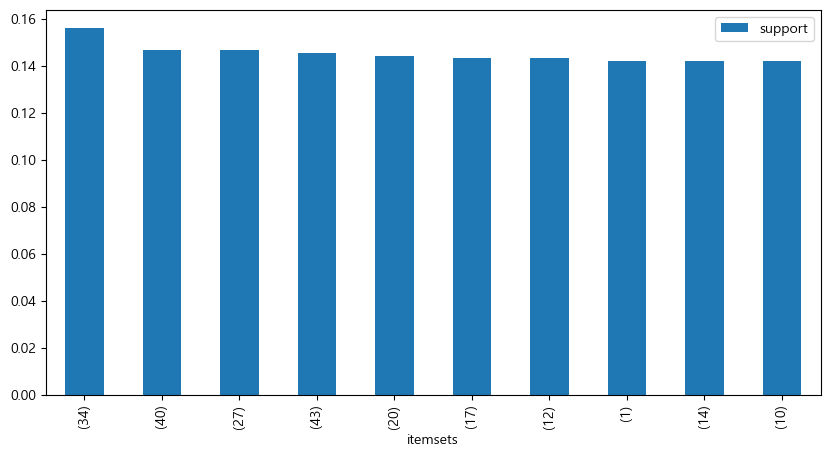

In [4]:
# 가장 빈도가 높은 상위 10개 수의 지지도와 빈도를 바그래프로 표현한다.
fset_sort = fset.sort_values(by='support', ascending=False)
fset_sort.head(10).plot(kind='bar', x='itemsets', y='frequency')
fset_sort.head(10).plot(kind='bar', x='itemsets', y='support')


### 2.
- aprior 함수를 사용하여 다음 조건에 따라 연관규칙을 생성하고, 이를 rule_1 이라는 변수에 저장하여 결과를 해석하시오.
    - 최소 지지도 : 0.002
    - 최소 신뢰도 : 0.8
    - 최소 조합 항목수 2
    - 최대 조합 항목수 6
- 도출된 연관규칙들을 향상도 기준으로 내림차순 정렬하여, 상위 30개의 규칙을 확인, 데이터프레임으로 변환, CSV파일로 저장

In [7]:
from pandas import DataFrame
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 트랜잭션 생성을 위해 로또번호만 추출한다.
transactions = lotto.iloc[:,1:].values

# 이항값으로 구성되는 트랜잭션 테이블을 생성한다.
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# 빈발집합을 생성한다.
fset = apriori(df, min_support=0.002, use_colnames=True, verbose=0)

asso_rules = association_rules(fset, metric='confidence', min_threshold=0.8)
asso_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(1, 3, 43)",(12),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf,0.858810
1,"(1, 3, 15)",(25),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf,0.872812
2,"(25, 3, 15)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,0.859977
3,"(25, 3, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,0.859977
4,"(29, 3, 37)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,0.859977
...,...,...,...,...,...,...,...,...,...,...
699,"(16, 26, 43, 31)",(36),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf,0.868145
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf,0.987165
701,"(16, 26, 36)","(43, 31)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf,0.983664
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,0.988331


In [ ]:
rule_1 = asso_rules.sort_values(by='lift', ascending=False)[['antecedents', 'consequents']].head(30)
rule_1.to_csv('빈발집합.csv')

####   1)  FIFA 데이터에서 각 선수의 키는 Height 변수에 피트와 인치로 입력되어 있습니다. 이를 cm으로 변환하여 새로운 변수 Height_cm을 생성하시오.    

####   2)  포지션을 의미하는 Position 변수를 아래 표를 참고하여 'Forward', 'Midfielder', 'Defender', 'GoalKeeper'로 재범주화하고, factor형으로 변환하여 Position_Class라는 변수를 생성하고 저장하시오.